# Subset seeding locations of the Global Model inside the Caribbean regions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import path, colors
from skimage import io
import urllib.request
import os

# Data from Lebreton and Andrady 2019 ([link](https://doi.org/10.6084/m9.figshare.5900335.v3))

In [2]:
# download the raw data
file = '../data/raw/LebretonAndrady2019_MismanagedPlasticWaste.tif'
if not os.path.isfile(file):
    url = 'https://figshare.com/ndownloader/files/28891242'
    req = urllib.request.urlretrieve(url, file)
else:
    pass   

In [3]:
# mismanaged plastic waste
mpw = io.imread('../data/raw/LebretonAndrady2019_MismanagedPlasticWaste.tif')
mpw = np.flipud(mpw)
mpw[mpw == 0] = np.nan

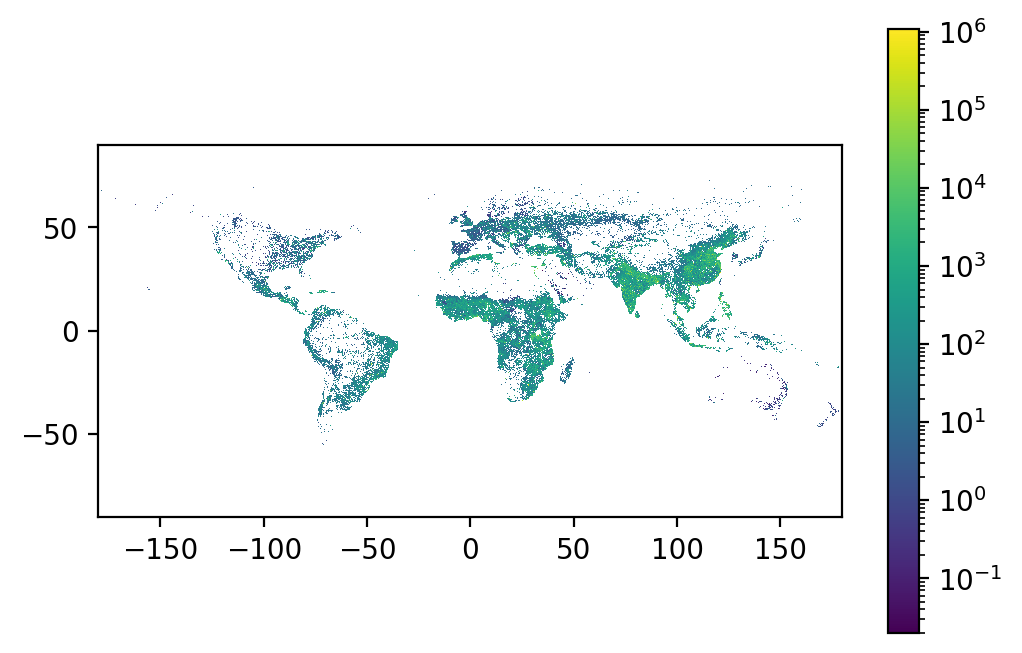

In [4]:
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(1,1,1,aspect='equal')

lon = np.linspace(-180, 180, mpw.shape[1])
lat = np.linspace(-90, 90, mpw.shape[0])

skip = 50
pcm1 = ax1.pcolormesh(lon[::skip], lat[::skip], mpw[::skip, ::skip], shading='auto',
                    norm=colors.LogNorm())
fig.colorbar(pcm1, ax=ax1)

# Using Xiaobiao pre-process output

- this will be modified so we have all the steps here starting from the raw data from Lebreton and Andrady 2019 ([link](https://doi.org/10.6084/m9.figshare.5900335.v3))

## Coasts

In [5]:
folder = '../data/raw/temp/'

csv_files = [folder + 'coasts_all_x.csv',
             folder + 'coasts_all_y.csv',
             folder + 'coasts_all_w.csv']

df = pd.concat([pd.read_csv(file, header=None) for file in csv_files], axis=1)
df.columns = ['lon', 'lat', 'weight']

## Rivers

In [6]:
csv_files = [folder + 'rivers_all_x.csv',
             folder + 'rivers_all_y.csv',
             folder + 'rivers_all_w.csv']

df_r = pd.concat([pd.read_csv(file, header=None) for file in csv_files], axis=1)
df_r.columns = ['lon', 'lat', 'weight']

In [7]:
df_r

,lon,lat,weight
0,3.8659,37.1401,12.7833
1,5.9465,37.0161,35.0865
2,7.8943,37.1285,12.4245
3,3.6030,37.0258,28.7290
4,3.1497,37.0693,12.5625
...,...,...,...
3582,91.3428,22.2389,1425.4600
3583,91.3840,22.2174,1425.4600
3584,91.3574,22.2282,1425.4600
3585,91.3282,22.2190,1425.4600


## Subset in the Caribbean

In [8]:
def particles_caribbean(x, y, xc, yc):
    """
    Retrieve coordinates (x,y) located inside a contour defined by (xc, yc)

    Args:
        x: longitude of coordinates
        y: latitude of coordinates
        xc: latitude of the contour
        yc: longitude of the contour
        
    Return:
        logical arrays len(x)
    """
    p = path.Path(np.vstack((xc, yc)).T)
    return p.contains_points(np.vstack((x, y)).T)

xc = np.array([-51.1160, -76.5536, -77.9330, -79.3800, -81.1240, -82.7476, -85.6943, 
               -87.3180, -98.5000, -98.5000, -66.6913, -51.1160, -51.1160])

yc = np.array([0.2951, 7.6000, 8.7523, 9.3000, 8.4737, 8.8345, 12.2623, 
               14.8481, 18.9975, 31.0000, 31.0000, 31.0000, 0.2951])

In [9]:
print(f'domain [{min(xc)}, {max(xc)}] x [{min(yc)}, {max(yc)}]')

domain [-98.5, -51.116] x [0.2951, 31.0]


In [10]:
output_folder = '../data/process/'

df_subset = df[particles_caribbean(df.lon, df.lat, xc, yc)]
df_subset.to_csv(join(output_folder, 'coasts.csv'), index=False)

df_subset_r = df_r[particles_caribbean(df_r.lon, df_r.lat, xc, yc)]
df_subset_r.to_csv(join(output_folder, 'rivers.csv'), index=False)

NameError: name 'join' is not defined

In [ ]:
## Plot in the region
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df_subset.lon, df_subset.lat, s=0.2, color='k')
ax.scatter(df_subset_r.lon, df_subset_r.lat, s=0.2, color='r')